### Stock market direction prediction for apple using Alpha 101 & Classification algorithm

We prepare have imported dataset from yahoo finance and features data from alpha 101 and few calculations using artificial intelligence techniques to predict stock direction. Here the direction of stock and our prediction signal i.e. alpha should match to give good prediction.. This paper can help in predicting the stock market share like google direction to help in building trading strategy. minimizing pending cases. With the help of this algorithm user will be able to perform sell and buy correctly

#### 1. Import Library

In [33]:
import sklearn
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt
from sklearn import model_selection
from sklearn.metrics import *
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import *
from sklearn.ensemble import *
from sklearn.model_selection import GridSearchCV
from mlxtend.classifier import StackingClassifier
from sklearn.svm import SVC
import seaborn as sns
%matplotlib inline
import numpy as np
from time import time
from scipy import stats
import pandas_techinal_indicators as ta
import math
from numpy import *
from scipy.stats import rankdata
import pandas as pd

#### 2. Read the data

In [2]:
df = pd.read_excel("AAPL.xlsx" )
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2014-02-03,71.801430,72.532860,71.328575,71.647141,60.977806,100366000
1,2014-02-04,72.264282,72.779999,71.822861,72.684288,61.860519,94170300
2,2014-02-05,72.365715,73.611427,72.321426,73.227142,62.322529,82086200
3,2014-02-06,72.865715,73.357140,72.544289,73.215714,65.021019,64441300
4,2014-02-07,74.482857,74.704285,73.911430,74.239998,65.930649,92570100


In [3]:
df= df.drop("Adj Close", axis = 1)

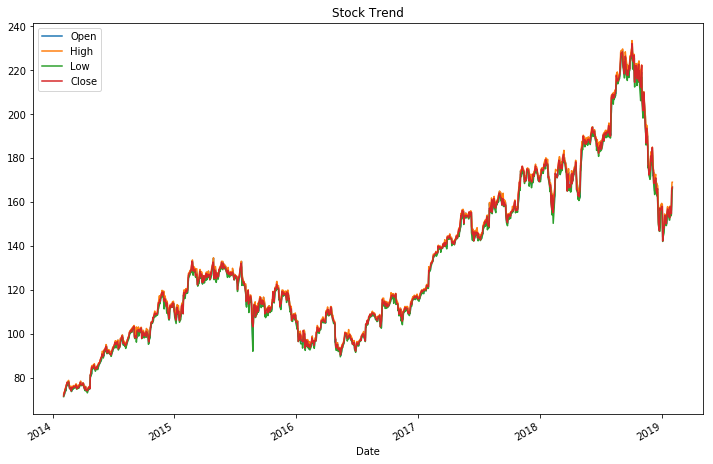

In [4]:
df.plot(x = "Date", y = ['Open','High','Low','Close'],figsize=(12,8), title= "Stock Trend")

In [14]:
df.describe()

,Open,High,Low,Close,Volume
count,1259.000000,1259.000000,1259.000000,1259.000000,1.259000e+03
mean,132.610080,133.760306,131.445262,132.634135,4.183949e+07
std,36.787727,37.141989,36.424603,36.775360,2.150498e+07
min,72.244215,72.975282,71.848299,72.425074,1.147590e+07
25%,105.824841,106.976422,105.160657,106.001135,2.651850e+07
50%,121.233428,122.242913,120.325448,121.520893,3.637910e+07
75%,158.881338,160.040362,157.322679,158.789626,5.114135e+07
max,229.012454,231.515750,226.606253,229.101775,1.899779e+08


In [15]:
df =df.sort_values(by='Date', ascending=False)

In [16]:
df.head()

,Date,Open,High,Low,Close,Volume
1258,2019-02-01,166.960007,168.979996,165.929993,166.520004,32647100
1257,2019-01-31,166.393336,168.993332,165.016663,166.466669,40739600
1256,2019-01-30,164.597144,167.368567,162.281425,165.771430,61109800
1255,2019-01-29,160.145334,162.441334,157.923332,159.855997,41587200
1254,2019-01-28,157.897416,159.287098,155.722905,158.020645,26192100


#### 3. Exponential Smoothing

In [17]:
def get_exp_preprocessing(df, alpha=.5):
    edata = df.ewm(alpha=alpha).mean()    
    return edata

df['Open'] = get_exp_preprocessing(df['Open'], .5)
df['Close'] = get_exp_preprocessing(df['Close'], .5)
df['High'] = get_exp_preprocessing(df['High'], .5)
df['Low'] = get_exp_preprocessing(df['Low'], .5)
df = df.dropna(axis = 0)

In [18]:
df.head()

,Date,Open,High,Low,Close,Volume
1258,2019-02-01,166.960007,168.979996,165.929993,166.520004,32647100
1257,2019-01-31,166.582227,168.988887,165.321106,166.484448,40739600
1256,2019-01-30,165.447894,168.062990,163.584145,166.077009,61109800
1255,2019-01-29,162.619862,165.064774,160.565045,162.759136,41587200
1254,2019-01-28,160.182470,162.082748,158.065876,160.313463,26192100


#### 4. Calulate the Return

In [19]:
#returns = daily close-to-close returns
def returns (row):
    result = ( row["Close"] - row["Open"])/row["Close"]
    return result
df["returns"] = df.apply(returns, axis = 1)

#### 5. Calculate Target Label

In [20]:
df['target']= np.sign( df["Close"] - df["Close"].shift(-1))
df.drop(df[df.target == 0].index, inplace=True)
df['target'].unique()

C:\Users\SANJAY\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in sign
  """Entry point for launching an IPython kernel.


array([ 1., -1., nan])

In [21]:
df.head()

,Date,Open,High,Low,Close,Volume,returns,target
1258,2019-02-01,166.960007,168.979996,165.929993,166.520004,32647100,-0.002642,1.0
1257,2019-01-31,166.582227,168.988887,165.321106,166.484448,40739600,-0.000587,1.0
1256,2019-01-30,165.447894,168.062990,163.584145,166.077009,61109800,0.003788,1.0
1255,2019-01-29,162.619862,165.064774,160.565045,162.759136,41587200,0.000856,1.0
1254,2019-01-28,160.182470,162.082748,158.065876,160.313463,26192100,0.000817,1.0


#### 5. Alpha Library
##### alpha 101 library creation

In [22]:
def a101 (row):
    return ( row["Close"] - row["Open"] ) / ( ( row["High"] - row["Low"] ) + 0.001) 
df["A101"] = df.apply(a101, axis = 1)

#### 6. Calculate simple moving average

In [23]:
df['AvgP5'] = ta.sma(df['Close'], 5)
df['AvgP10'] = ta.sma(df['Close'], 10)
df['AvgP15'] = ta.sma(df['Close'], 15)

In [24]:
df = df.dropna(axis = 0)

In [26]:
df.head()

,Date,Open,High,Low,Close,Volume,returns,target,A101,AvgP5,AvgP10,AvgP15
1244,2019-01-11,152.398557,153.980746,151.271632,152.804721,27023200,0.002658,-1.0,0.149870,154.339298,155.386814,158.401480
1243,2019-01-10,152.377879,153.837745,151.098121,152.899565,35780700,0.003412,-1.0,0.190353,153.842334,154.768609,157.493451
1242,2019-01-09,152.100734,153.975062,150.687710,153.025885,45099100,0.006046,1.0,0.281342,153.380970,154.354932,156.596213
1241,2019-01-08,151.396260,153.470623,150.043178,152.488489,41025300,0.007163,1.0,0.318579,152.927871,154.016442,155.690312
1240,2019-01-07,150.546074,152.184354,148.846246,151.214513,54777800,0.004420,1.0,0.200185,152.486635,153.647120,154.920670


Text(0.5, 1.0, ' Correlation between various paramters')

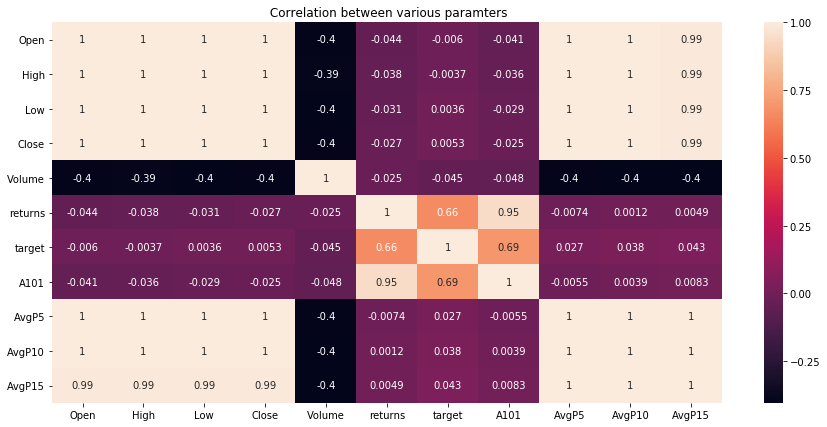

In [27]:
plt.figure(figsize=(15,7))
sns.heatmap(df.corr(), annot = True)
plt.title(" Correlation between various paramters")

#### 7. Stacking classifier for A101

In [28]:
X = df[[ "Open", "High", "Low", "Close","AvgP5","AvgP10", "AvgP15","returns","A101"]]

In [29]:
from scipy import stats
X = stats.zscore(X)

In [34]:
y = df["target"]
clf1 = KNeighborsClassifier(n_neighbors= 100,leaf_size=20, weights = 'uniform', metric='minkowski')
clf2 = RandomForestClassifier(n_estimators = 50, max_depth = 3, criterion='gini', bootstrap= False)
clf3 = SVC(kernel='rbf',gamma= 0.001, C= 1000)
lr = LogisticRegression()
sclf = StackingClassifier(classifiers=[clf1, clf2, clf3],meta_classifier=lr)

print('3-fold cross validation:\n')
for clf, label in zip([clf1, clf2, clf3, sclf], ['KNN', 'Random Forest','Support vector','StackingClassifier']):
    scores = model_selection.cross_val_score(clf, X, y,cv=5, scoring='accuracy')
    print("Accuracy: %0.2f (+/- %0.2f) [%s]" % (scores.mean(), scores.std(), label))

3-fold cross validation:

Accuracy: 0.82 (+/- 0.02) [KNN]
Accuracy: 0.83 (+/- 0.02) [Random Forest]
Accuracy: 0.84 (+/- 0.02) [Support vector]
Accuracy: 0.83 (+/- 0.02) [StackingClassifier]


#### 8. Apply PCA on all the feature for dimension reduction

In [35]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(X)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2'])

In [36]:
principalDf.head()

,principal component 1,principal component 2
0,1.540940,0.702983
1,1.514366,0.928661
2,1.482390,1.579323
3,1.436398,1.851298
4,1.383268,1.106645


In [37]:
y = df["target"]
clf1 = KNeighborsClassifier(n_neighbors= 100,leaf_size=20, weights = 'uniform', metric='minkowski')
clf2 = RandomForestClassifier(n_estimators = 50, max_depth = 3, criterion='gini', bootstrap= False)
clf3 = SVC(kernel='rbf',gamma= 0.001, C= 1000)
lr = LogisticRegression()
sclf = StackingClassifier(classifiers=[clf1, clf2, clf3],meta_classifier=lr)

print('3-fold cross validation:\n')
for clf, label in zip([clf1, clf2, clf3, sclf], ['KNN', 'Random Forest','Support vector','StackingClassifier']):
    scores = model_selection.cross_val_score(clf, principalDf, y,cv=5, scoring='accuracy')
    print("Accuracy: %0.2f (+/- %0.2f) [%s]" % (scores.mean(), scores.std(), label))

3-fold cross validation:

Accuracy: 0.82 (+/- 0.02) [KNN]
Accuracy: 0.82 (+/- 0.03) [Random Forest]
Accuracy: 0.82 (+/- 0.02) [Support vector]
Accuracy: 0.82 (+/- 0.03) [StackingClassifier]


#### 9. Model Comparision using K-fold vaidation

KNN: 0.808679 (0.042406)
BC: 0.827926 (0.053446)
ABC: 0.808630 (0.077859)
GB: 0.818200 (0.073212)
SVM: 0.835988 (0.066471)
RDF: 0.829601 (0.050077)


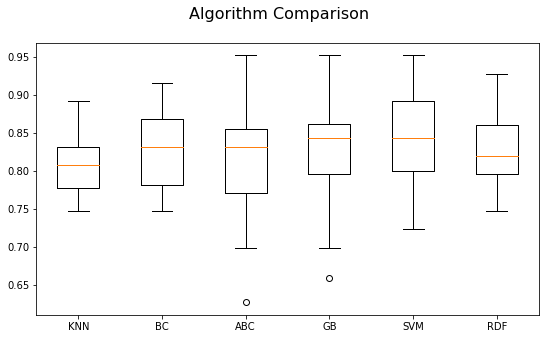

In [38]:
models = []
models.append(('KNN', KNeighborsClassifier()))
models.append(('BC', BaggingClassifier(n_estimators=40, max_samples=.5)))
models.append(('ABC', AdaBoostClassifier( n_estimators= 50)))
models.append(('GB', GradientBoostingClassifier(n_estimators = 50, learning_rate = 0.05)))
models.append(('SVM', SVC(kernel='rbf',gamma= 0.0001, C= 1000)))
models.append(('RDF', RandomForestClassifier(n_estimators = 100,oob_score=True)))

# evaluate each model in turn
results = []
names = []
scoring = 'accuracy'
for name, model in models:
	kfold = model_selection.KFold(n_splits=15, random_state=19)
	cv_results = model_selection.cross_val_score(model, X, y, cv=kfold, scoring=scoring)
	results.append(cv_results)
	names.append(name)
	msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
	print(msg)
# boxplot algorithm comparison
fig = plt.figure(figsize= (9,5), )
fig.suptitle('Algorithm Comparison',fontsize=16)
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

#### 10. Apply Machine learning algorithm

In [39]:
X_train,X_test, Y_train, Y_test = sklearn.model_selection.train_test_split(X,y,train_size=0.7, test_size=0.3, random_state= 40)

#### 11. Apply Grid Serach Algorithm to find the best best param for
#### 1. Random forest

In [40]:
#making the instance
model=RandomForestClassifier()
#hyper parameters set
params = {'criterion':['gini','entropy'],'n_estimators':[10,15,20,25,30],'max_depth': [10,15,20,25,50],'min_samples_leaf':[1,2,3],
          'min_samples_split':[3,4,5,6,7], 'random_state':[123],'n_jobs':[-1]}
#Making models with hyper parameters sets
model1 = GridSearchCV(model, param_grid=params, n_jobs=-1)
#learning
model1.fit(X_train,Y_train)
#The best hyper parameters set
print("Best Hyper Parameters:\n",model1.best_params_)

Best Hyper Parameters:
 {'criterion': 'entropy', 'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 3, 'n_estimators': 10, 'n_jobs': -1, 'random_state': 123}


In [45]:
#Prediction
Y_pred=model1.predict(X_test)
print('RF Accuracy Score: ',accuracy_score(Y_test,Y_pred)*100,'%',sep='')
print('RF Confusion Matrix: ',confusion_matrix(Y_test,Y_pred), sep = '\n')
print('RF Classification Report: ',classification_report(Y_test,Y_pred), sep = '\n')

RF Accuracy Score: 83.9572192513369%
RF Confusion Matrix: 
[[125  28]
 [ 32 189]]
RF Classification Report: 
             precision    recall  f1-score   support

       -1.0       0.80      0.82      0.81       153
        1.0       0.87      0.86      0.86       221

avg / total       0.84      0.84      0.84       374



#### 2. K- Nearest Neighbor

In [42]:
#making the instance
model = KNeighborsClassifier(n_jobs=-1)
#Hyper Parameters Set
params = {'n_neighbors':[20, 40, 60],'leaf_size':[3,5],'weights':['uniform', 'distance'],'n_jobs':[-1]}
#Making models with hyper parameters sets
model2 = GridSearchCV(model, param_grid=params, n_jobs=1)
#Learning
model2.fit(X_train,Y_train)
#The best hyper parameters set
print("Best Hyper Parameters:\n",model2.best_params_)

Best Hyper Parameters:
 {'leaf_size': 3, 'n_jobs': -1, 'n_neighbors': 60, 'weights': 'distance'}


In [46]:
Y_pred=model2.predict(X_test)
print('KNN Accuracy Score: ',accuracy_score(Y_test,Y_pred)*100,'%',sep='')
print('KNN Confusion Matrix: ',confusion_matrix(Y_test,Y_pred), sep = '\n')
print('KNN Classification Report: ',classification_report(Y_test,Y_pred), sep = '\n')

KNN Accuracy Score: 85.8288770053476%
KNN Confusion Matrix: 
[[124  29]
 [ 24 197]]
KNN Classification Report: 
             precision    recall  f1-score   support

       -1.0       0.84      0.81      0.82       153
        1.0       0.87      0.89      0.88       221

avg / total       0.86      0.86      0.86       374



#### 3. Support vector Machine

In [48]:
model=SVC()
#Hyper Parameters Set
params = {'C': [500, 1000], 'kernel': ['linear','rbf']}
#Making models with hyper parameters sets
model3 = GridSearchCV(model, param_grid=params, n_jobs=-1)
#Learning
model3.fit(X_train,Y_train)
#The best hyper parameters set
print("Best Hyper Parameters:\n",model3.best_params_)

Best Hyper Parameters:
 {'C': 500, 'kernel': 'rbf'}


In [49]:
#Prediction
Y_pred=model3.predict(X_test)
#importing the metrics module

print('SVM Accuracy Score: ',accuracy_score(Y_test,Y_pred)*100,'%',sep='')
print('SVM Confusion Matrix: ',confusion_matrix(Y_test,Y_pred), sep = '\n')
print('SVM Classification Report: ',classification_report(Y_test,Y_pred), sep = '\n')

SVM Accuracy Score: 88.23529411764706%
SVM Confusion Matrix: 
[[131  22]
 [ 22 199]]
SVM Classification Report: 
             precision    recall  f1-score   support

       -1.0       0.86      0.86      0.86       153
        1.0       0.90      0.90      0.90       221

avg / total       0.88      0.88      0.88       374



### 12. Trend Analysis

### filter data for november month

In [38]:
df.head()

,Date,Open,High,Low,Close,Volume,returns,target,A101,AvgP5,AvgP10,AvgP15
1244,2019-01-11,152.214399,153.419486,150.989231,152.188785,27023200,-0.000168,-1.0,-0.010535,153.871018,154.644139,157.538409
1243,2019-01-10,152.357202,153.694748,150.924615,152.994406,35780700,0.004165,-1.0,0.229944,153.345443,154.154754,156.636702
1242,2019-01-09,151.823593,154.112377,150.277305,153.152203,45099100,0.008675,1.0,0.346347,152.919673,153.942605,155.749071
1241,2019-01-08,150.691791,152.966187,149.398651,151.951097,41025300,0.008288,1.0,0.352891,152.474813,153.678295,154.827716
1240,2019-01-07,149.695892,150.898091,147.649319,149.940541,54777800,0.001632,1.0,0.075282,152.045407,153.277766,154.166685


In [39]:
df_sample = df[(df["Date"]  >= "2018-09-1") &  (df["Date"]  <= "2018-11-30")]

### Plot price return with Alpha 101

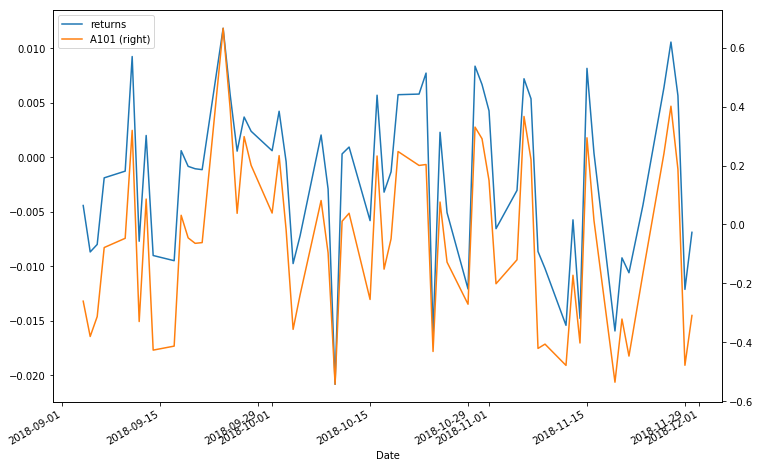

In [40]:
df_sample.plot( x = "Date", y =  ["returns","A101"],secondary_y="A101", figsize=(12,8) )

OBS: no of A101 trend is in negative and return is in negative is hit

#### 13. Deploy the model which can be used for further stocks 


In [50]:
import pickle
with open('knn.pkl', 'wb') as model_pkl:
    pickle.dump(model3, model_pkl, protocol=2)